# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# OpenWeatherMap API Key
api_key = "2256a01a1f710600c54ff80eb069daa4"

# URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [9]:
# append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Need call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Castelo Branco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=castelo branco
Processing Record 2 | Road Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=road town
Processing Record 3 | Sweetwater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=sweetwater
Processing Record 4 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=busselton
Processing Record 5 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=talnakh
Processing Record 6 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=taoudenni
Processing Record 7 | Port Elizabeth
http://api.openweathermap.or

Processing Record 57 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=albany
Processing Record 58 | Piura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=piura
Processing Record 59 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=walvis bay
Processing Record 60 | Leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=leh
Processing Record 61 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=saint-philippe
Processing Record 62 | Barinitas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=barinitas
Processing Record 63 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=dune

Processing Record 113 | Goure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=goure
Processing Record 114 | Huilong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=huilong
Processing Record 115 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=bonavista
Processing Record 116 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=faya
Processing Record 117 | San Isidro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=san isidro
Processing Record 118 | Reconquista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=reconquista
Processing Record 119 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069d

Processing Record 168 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=aklavik
Processing Record 169 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=pisco
Processing Record 170 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=roald
City not found. Skipping...
Processing Record 171 | Luwuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=luwuk
Processing Record 172 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=ancud
City not found. Skipping...
Processing Record 173 | Cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=cururupu
Processing Record 174 | Gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 224 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=arraial do cabo
Processing Record 225 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=hasaki
Processing Record 226 | Fatezh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=fatezh
Processing Record 227 | Axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=axim
Processing Record 228 | Preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=preobrazheniye
Processing Record 229 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=faanui
Processing Record 230 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80

Processing Record 280 | Chuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=chuzhou
Processing Record 281 | Cobourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=cobourg
City not found. Skipping...
Processing Record 282 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=saldanha
City not found. Skipping...
City not found. Skipping...
Processing Record 283 | Savannakhet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=savannakhet
Processing Record 284 | Daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=daru
Processing Record 285 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=iquitos
Processing Record 286 | College
http://api.openweather

City not found. Skipping...
Processing Record 334 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=cayenne
Processing Record 335 | Sokoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=sokoni
Processing Record 336 | Gorom-Gorom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=gorom-gorom
Processing Record 337 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=vila velha
Processing Record 338 | Baft
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=baft
Processing Record 339 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=qaqortoq
Processing Record 340 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=22

Processing Record 390 | Shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=shenjiamen
Processing Record 391 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=broome
Processing Record 392 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=ucluelet
Processing Record 393 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=la ronge
Processing Record 394 | Kaoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=kaoma
City not found. Skipping...
Processing Record 395 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=mehamn
Processing Record 396 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f71

Processing Record 447 | Ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=ugoofaaru
Processing Record 448 | Guanica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=guanica
Processing Record 449 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=thinadhoo
Processing Record 450 | Iranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=iranshahr
Processing Record 451 | Miranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=miranda
Processing Record 452 | Itatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=itatskiy
Processing Record 453 | Stonewall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb0

Processing Record 503 | Lock Haven
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=lock haven
Processing Record 504 | Romilly-sur-Seine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=romilly-sur-seine
Processing Record 505 | Gdynia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=gdynia
Processing Record 506 | Sol-Iletsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=sol-iletsk
Processing Record 507 | Delijan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=delijan
Processing Record 508 | Ndungu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=ndungu
Processing Record 509 | Killybegs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f71

Processing Record 558 | Bikaner
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=bikaner
Processing Record 559 | Tonantins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=tonantins
City not found. Skipping...
Processing Record 560 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=tuatapere
Processing Record 561 | Hilton Head Island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=hilton head island
Processing Record 562 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=amapa
Processing Record 563 | Aitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2256a01a1f710600c54ff80eb069daa4&q=aitape
Processing Record 564 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Im

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [25]:
# Save data frame to CSV
weather_data.to_csv('CN_weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Castelo Branco,100,PT,1575831144,93,39.82,-7.50,52.00,3.42
1,Road Town,40,VG,1575831145,66,18.42,-64.62,84.20,5.82
2,Sweetwater,1,US,1575831147,30,32.47,-100.41,72.00,18.34
3,Busselton,0,AU,1575831148,47,-33.64,115.35,57.99,10.74
4,Talnakh,99,RU,1575831149,75,69.49,88.39,-20.20,8.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

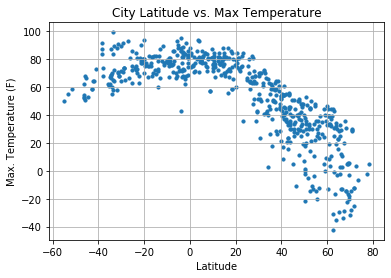

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Max_Temp_vs_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

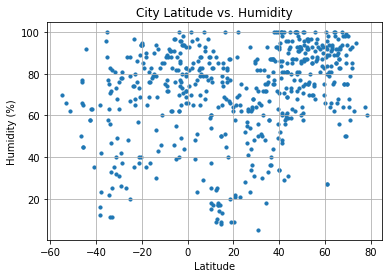

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_Latitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

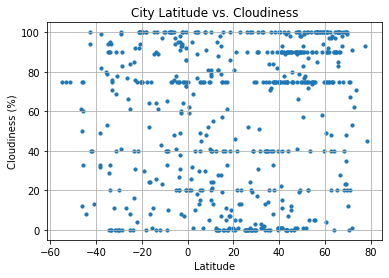

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

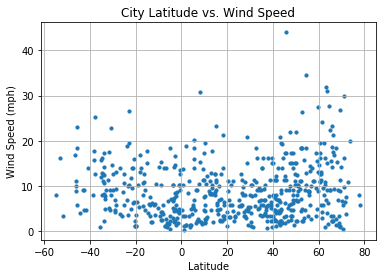

In [23]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_Latitude.png")

plt.show()